In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings(action  = 'ignore')

In [2]:
CocaCola_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
CocaCola_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
CocaCola_data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [7]:
CocaCola_data.shape

(42, 2)

In [8]:
CocaCola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


## Plotting the CocaCola dataset:-

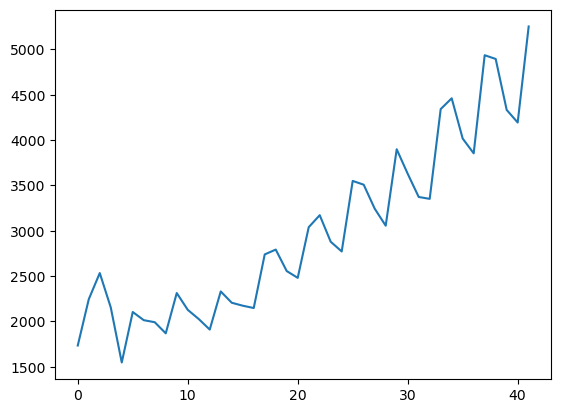

In [5]:
CocaCola_data.Sales.plot()
plt.show()

## Separating Train and Test Data:-

In [10]:
train=CocaCola_data.head(25)
test=CocaCola_data.tail(17)
train

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [11]:
test

,Quarter,Sales
25,Q2_92,3550.000000
26,Q3_92,3508.000000
27,Q4_92,3243.859993
28,Q1_93,3056.000000
29,Q2_93,3899.000000
30,Q3_93,3629.000000
31,Q4_93,3373.000000
32,Q1_94,3352.000000
33,Q2_94,4342.000000
34,Q3_94,4461.000000


## Plotting the Moving Average of the data:-

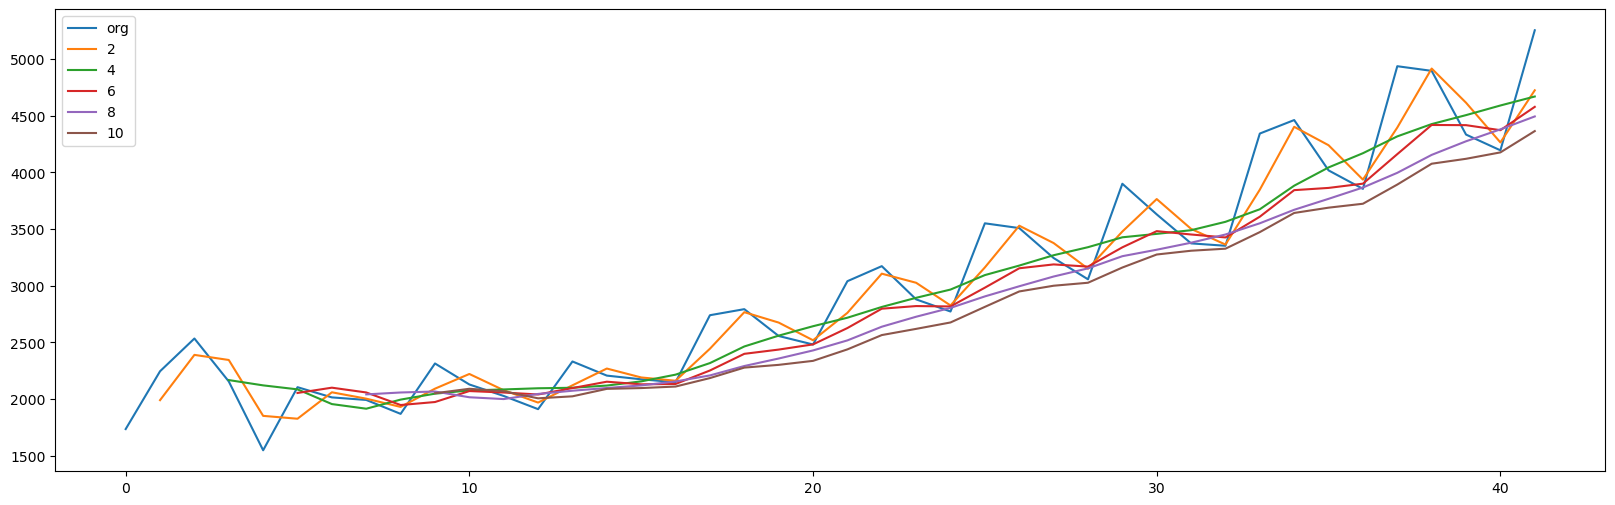

In [12]:
a=range(2,12,2)
plt.figure(figsize=(20,6))
CocaCola_data.Sales.plot(label="org")
for i in a:
    CocaCola_data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 
plt.show()

## Time Series Decomposition Plot:-

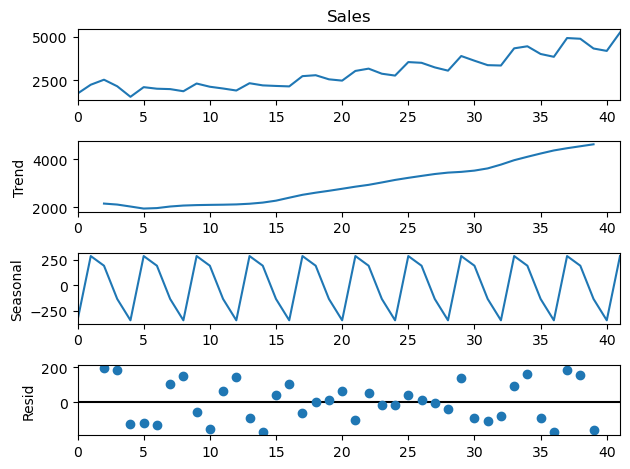

In [13]:
decompose_ts_add=seasonal_decompose(CocaCola_data.Sales,period=4)
decompose_ts_add.plot()
plt.show()

### Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF) Plots:-

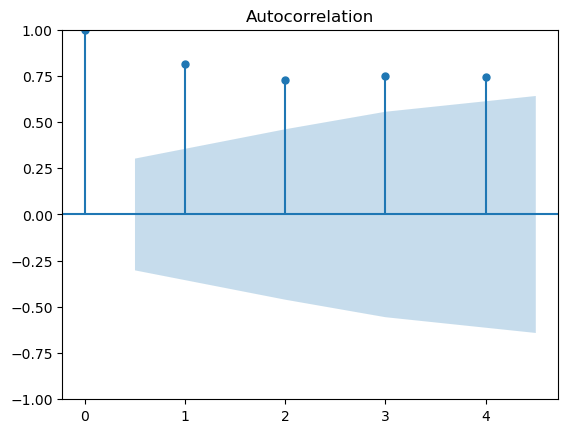

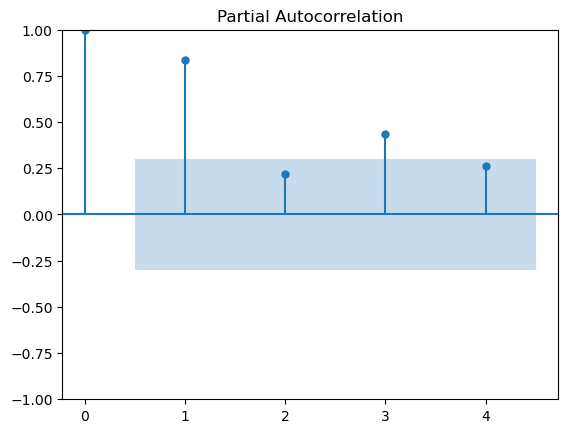

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(CocaCola_data.Sales,lags=4)
tsa_plots.plot_pacf(CocaCola_data.Sales,lags=4)
plt.show()

## Evaluation Matrix - The Mean Absolute Percentage Error(MAPE):-

In [15]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [16]:
weights=np.array([0.1,0.2,0.3,0.4])

## Weighted Moving Average:-

In [18]:
df=pd.DataFrame()
df['Sales']=CocaCola_data.Sales
df['WMA']=df['Sales'].rolling(4).apply(lambda x:np.sum(weights*x))
df

,Sales,WMA
0,1734.827000,NaN
1,2244.960999,NaN
2,2533.804993,NaN
3,2154.962997,2244.601596
4,1547.818996,1996.873596
5,2104.411995,1990.483596
6,2014.362999,1962.128897
7,1991.746998,1976.671997
8,1869.049999,1958.457898
9,2313.631996,2085.953498


## Plotting/Mapping Weighted Moving Average:-

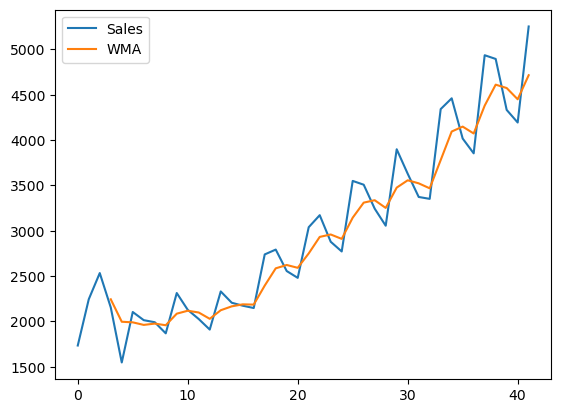

In [19]:
df.Sales.plot(kind='line')
df.WMA.plot(kind='line')
plt.legend()
plt.show()

## Simple Exponential Method:-

In [20]:
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

30.213066190248316

## Plotting/Mapping - Predictions for Test Data:-

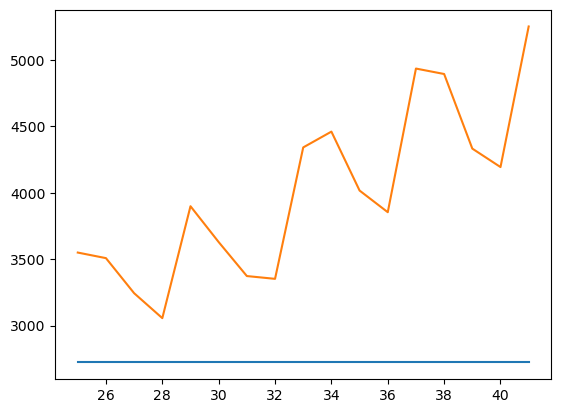

In [22]:
plt.plot(pred_ses)
plt.plot(test.Sales)
plt.show()

## Plotting the Whole Data:-

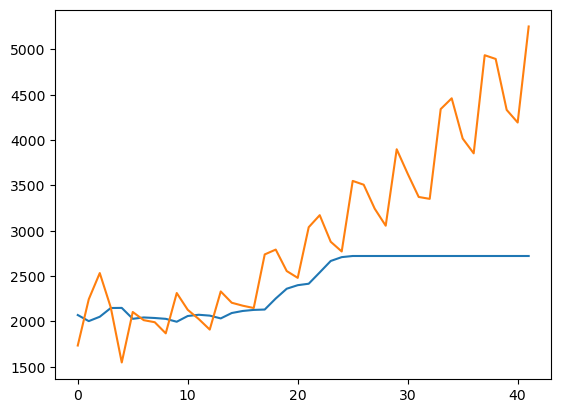

In [24]:
plt.plot(ses_model.predict(start=CocaCola_data.index[0],end=CocaCola_data.index[-1]))
plt.plot(CocaCola_data.Sales)
plt.show()

## Finding the best Smoothing Level Value:-

In [25]:
acc_ses={}
for i in range(101):
    ses_model=SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=i/100)
    pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
    acc_ses[MAPE(pred_ses,test.Sales)]=i
    
print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys()))) 

47:26.895859535265508


## Building a model with 1 as the Smoothing Level Values:-

In [26]:
ses_model=SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=1)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

28.931661741716336

## Plotting the Predictions on Test Data:-

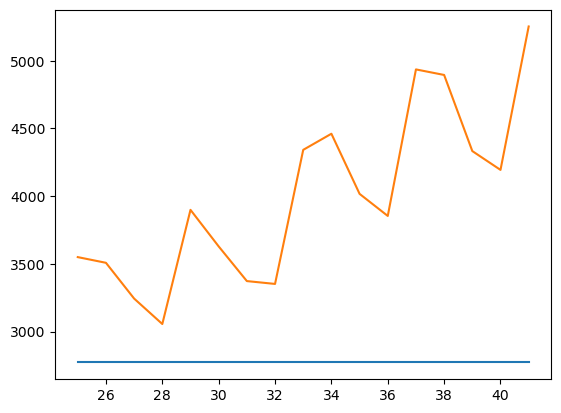

In [27]:
plt.plot(pred_ses)
plt.plot(test.Sales)
plt.show()

## Plotting the Whole Data:-

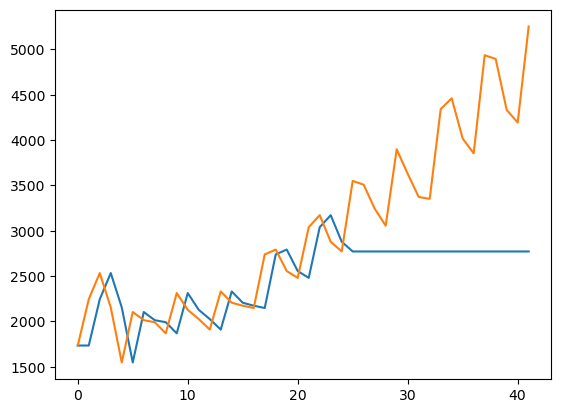

In [28]:
plt.plot(ses_model.predict(start=CocaCola_data.index[0],end=CocaCola_data.index[-1]))
plt.plot(CocaCola_data.Sales)
plt.show()

## Building a Model with Holt Method:-

In [29]:
holt_model=Holt(train["Sales"]).fit(smoothing_level=0.8,smoothing_slope=0.3)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test.Sales)

29.079342302609614

## Plotting the Predictions on Test Data:-

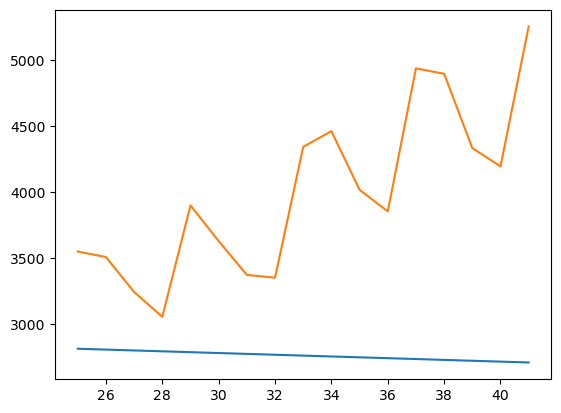

In [30]:
plt.plot(pred_holt)
plt.plot(test.Sales)
plt.show()

## Plotting the Whole Data:-

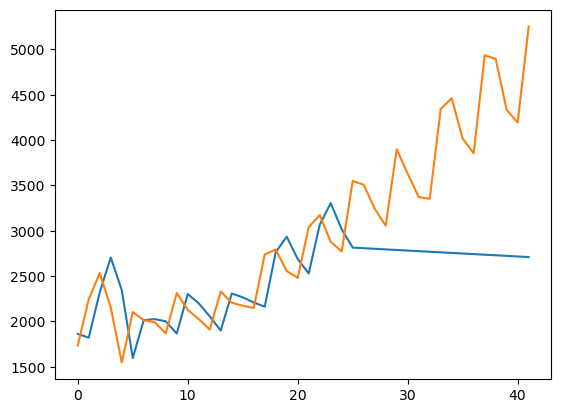

In [31]:
plt.plot(holt_model.predict(start=CocaCola_data.index[0],end = CocaCola_data.index[-1]))
plt.plot(CocaCola_data.Sales)
plt.show()

## Finding the best Hyperparameters:-

In [32]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model=Holt(train["Sales"]).fit(smoothing_level=i/100,smoothing_slope=j/100)
        pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
        accuracy[MAPE(pred_holt,test.Sales)]=(i,j)

In [33]:
accuracy[min(accuracy.keys())]

(11, 96)

In [34]:
min(accuracy.keys())

8.331024738361025

## Building a Model with Smoothing Value = 0.18 and Smoothing Slope = 0.77

In [35]:
holt_model=Holt(train["Sales"]).fit(smoothing_level=0.18,smoothing_slope=0.77)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test.Sales)

11.171486585699983

## Plotting the Predictions on Test Data:-

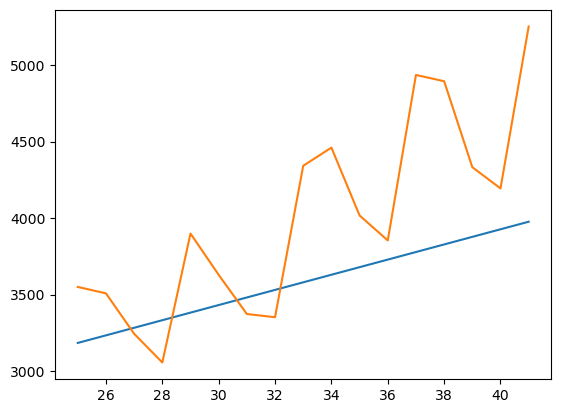

In [36]:
plt.plot(pred_holt)
plt.plot(test.Sales)
plt.show()

## Plotting the Whole Data:-

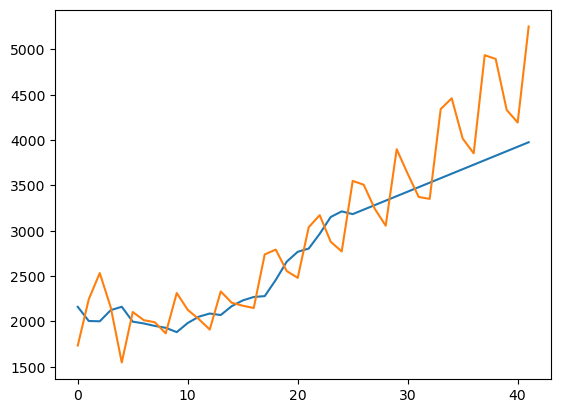

In [37]:
plt.plot(holt_model.predict(start=CocaCola_data.index[0],end=CocaCola_data.index[-1]))
plt.plot(CocaCola_data.Sales)
plt.show()

## Building a Model Using Holt's Winters Method:-

#### The best seasonal period value is = 4

In [38]:
hw_add_add = ExponentialSmoothing(train["Sales"],seasonal='add',seasonal_periods=4).fit()
pred_hw_add=hw_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_add,test.Sales)

21.796144415345942

## Plotting the Predictions on Test Data:-

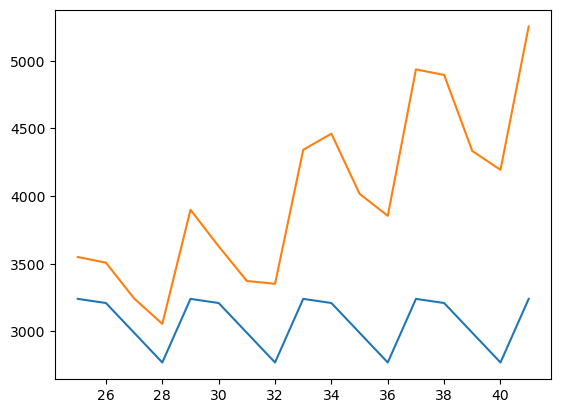

In [39]:
plt.plot(pred_hw_add)
plt.plot(test.Sales)
plt.show()

## Plotting the Whole Data:-

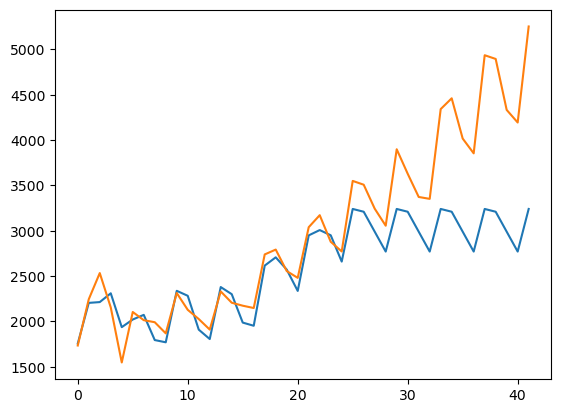

In [40]:
plt.plot(hw_add_add.predict(start=CocaCola_data.index[0],end=CocaCola_data.index[-1]))
plt.plot(CocaCola_data.Sales)
plt.show()

## Finding the best Hyperparameters;-

In [41]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw=ExponentialSmoothing(train["Sales"],seasonal=i,trend=j,seasonal_periods=12).fit()
        pred_hw=hw.predict(start=test.index[0],end=test.index[-1])
        acc_hw[MAPE(pred_hw,test.Sales)]=(i,j)

In [42]:
acc_hw[min(acc_hw.keys())]

('add', 'mul')

In [43]:
min(acc_hw.keys())

5.613802940037145

## Building a Model with Seasonality and Trend to be Multiplicative:-

In [44]:
hw=ExponentialSmoothing(train["Sales"],seasonal='mul',trend='mul',seasonal_periods=4).fit()
pred_hw=hw.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Sales)

3.7166569014791375

## Plotting the Predictions on Test Data;-

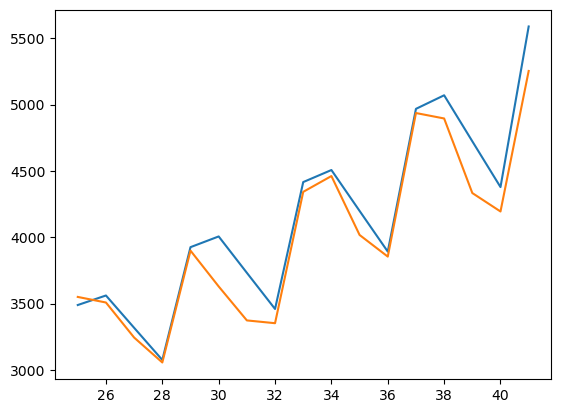

In [45]:
plt.plot(pred_hw)
plt.plot(test.Sales)
plt.show()

## Plotting the Whole Data:-

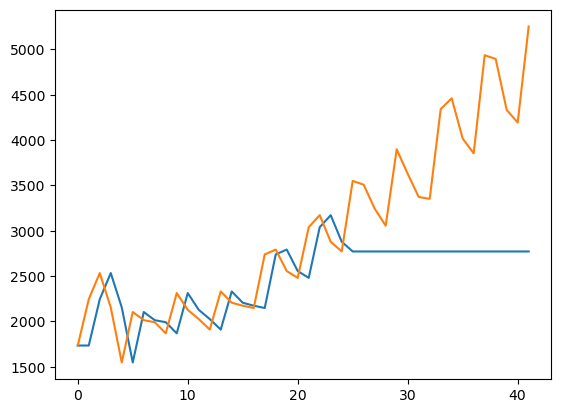

In [46]:
plt.plot(ses_model.predict(start=CocaCola_data.index[0],end=CocaCola_data.index[-1]))
plt.plot(CocaCola_data.Sales)
plt.show()

## Conclusion:-

##### Seasonal Exponential Smoothing - The best smoothing level value is 1 and the model build on this value has an RMS error value of 28.93.

##### Holt's Model - The best smoothing level value is 0.18 and smoothing slope value is 0.77.  The model build on these parameters have an RMS error value is 11.17.

#### Holt - Winter- Method   - Plotting both seasonal and trend to be multiplicative gives the best results. The model build with these parameters gives an RMS error is 3.716.


### From these conclusions we find that the Holt- Winter-Model is preferable.